In [10]:
from coders import BitStream, WavStream
from coders import SimpleFSK as Coder
import scipy.io.wavfile

coder = Coder()

Main vars: 75 5000 2 0.2
Secondary vars: 67 1000
Filter vars: 27 0.5 13
Peak vars: [13] 0.005


In [11]:
input_stream = BitStream(np.random.randint(2, size=20))
encoded = coder.encode(input_stream)
scipy.io.wavfile.write('test.wav', coder.r, encoded)
read_rate, read = scipy.io.wavfile.read('test.wav')
noisy = np.random.normal(0, 1, len(read)) * 0.2 + read

Frequency map: [ 81.67  81.67  81.67  55.    95.    55.    68.33  68.33  68.33  81.67]


In [12]:
wavstream = WavStream(noisy, read_rate, coder.symbol_len)
verification = input_stream.assymbolwidth(2)
decoded = coder.decode(read_rate, wavstream)
check = verification == decoded

> 2 80.16
> 2 80.16
> 2 80.16
> 0 55.11
> 3 95.19
> 0 55.11
> 1 70.14
> 1 70.14
> 1 72.69
> 2 80.16


Length: 10000
Quality: 1.0


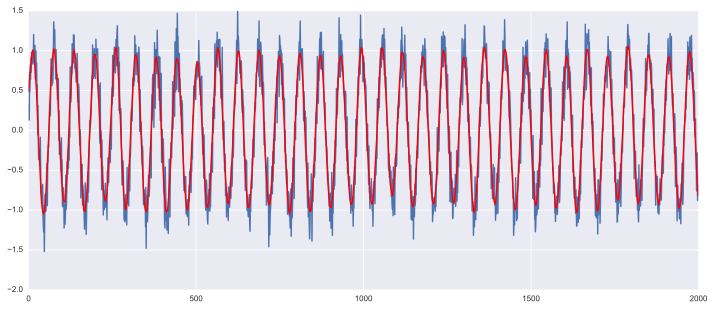

In [13]:
lim = (0, 2000)
sns.tsplot(wavstream[lim[0]:lim[1]])
sns.tsplot(coder.filter(wavstream)[lim[0]:lim[1]], color='r')
print('Length:', len(wavstream))
print('Quality:', check.sum()/len(check))